In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] # 解决中文显示问题，修改默认字体
plt.rcParams['axes.unicode_minus']=False # 解决保存图像时负号'-'显示为方块的问题
plt.style.use('ggplot') # 更改设计风格

In [9]:
df = pd.read_csv('f:/test/DataAnalyst.csv',encoding='gbk')

In [10]:
df.head().dropna()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,bottom,top,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,7,9,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,10,15,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,4,6,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,6,8,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,2,3,应届毕业生


# 重点

In [31]:
data = df.groupby(['city','companyId']).aggregate(['mean','count']).bottom.reset_index()

In [32]:
data.head()

,city,companyId,mean,count
0,上海,146,8.00,1
1,上海,165,11.75,4
2,上海,228,10.00,1
3,上海,436,25.00,1
4,上海,622,14.00,5


In [33]:
for edu,grouped in data.groupby('city'):
    print(edu)

上海
北京
南京
厦门
天津
广州
成都
杭州
武汉
深圳
苏州
西安
长沙


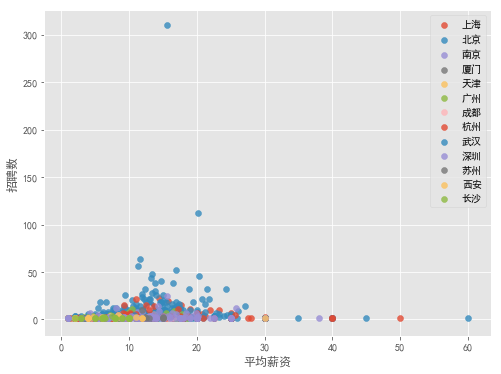

In [47]:
plt.figure(figsize=(8,6))
for city,grouped in data.groupby('city'):
    x = grouped['mean']
    y = grouped['count']
    plt.scatter(x,y,label=city,alpha=0.8)
plt.legend(loc='upper right')
plt.xlabel('平均薪资')
plt.ylabel('招聘数')
plt.show()